[Source](https://github.com/philtabor/Youtube-Code-Repository/blob/master/ReinforcementLearning/Fundamentals/sarsa.py)

### Action Space
    The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction
     of the fixed force the cart is pushed with.
    | Num | Action                 |
    |-----|------------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |
    **Note**: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle
     the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

### Observation Space
    The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:
    | Num | Observation           | Min                 | Max               |
    |-----|-----------------------|---------------------|-------------------|
    | 0   | Cart Position         | -4.8                | 4.8               |
    | 1   | Cart Velocity         | -Inf                | Inf               |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
    | 3   | Pole Angular Velocity | -Inf                | Inf               |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [6]:
DISCRETE_SIZE = 10
# model hyperparameters
ALPHA = 0.1
GAMMA = 0.9    
EPS = 1.0

np.random.seed(1)

In [4]:


def maxAction(Q, state):    
    values = np.array([Q[state,a] for a in range(2)])
    action = np.argmax(values)
    return action

#discretize the spaces
cartPosSpace = np.linspace(-2.4, 2.4, DISCRETE_SIZE)
cartVelSpace = np.linspace(-4, 4, DISCRETE_SIZE)
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, DISCRETE_SIZE)
poleThetaVelSpace = np.linspace(-4, 4, DISCRETE_SIZE)


def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))

    return (cartX, cartXdot, cartTheta, cartThetadot)

In [5]:
len(cartPosSpace)

10

In [7]:
#construct state space
states = []
for i in range(len(cartPosSpace)+1):
    for j in range(len(cartVelSpace)+1):
        for k in range(len(poleThetaSpace)+1):
            for l in range(len(poleThetaVelSpace)+1):
                states.append((i,j,k,l))

Q = {}
for s in states:
    for a in range(2): # 2=> Action Space
        Q[s, a] = 0

In [24]:
print(len(states))
print(len(Q))
print(len(cartPosSpace))

14641
29282
10


starting game 0
starting game 5000
starting game 10000
starting game 15000
starting game 20000
starting game 25000
starting game 30000
starting game 35000
starting game 40000
starting game 45000


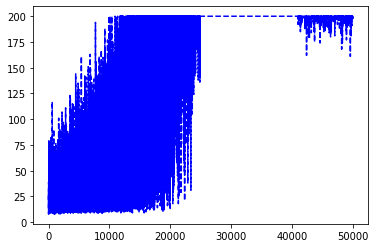

In [25]:
env = gym.make('CartPole-v0')

numGames = 50000
totalRewards = np.zeros(numGames)
for i in range(numGames):
    if i % 5000 == 0:
        print('starting game', i)
    # cart x position, cart velocity, pole theta, pole velocity
    observation = env.reset()        
    s = getState(observation)
    rand = np.random.random()
    a = maxAction(Q, s) if rand < (1-EPS) else env.action_space.sample()
    done = False
    epRewards = 0
    while not done:
        observation_, reward, done, info = env.step(a)   
        s_ = getState(observation_)
        rand = np.random.random()
        a_ = maxAction(Q, s_) if rand < (1-EPS) else env.action_space.sample()
        epRewards += reward
        Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,a_] - Q[s,a])
        s, a = s_, a_            
    EPS -= 2/(numGames) if EPS > 0 else 0
    totalRewards[i] = epRewards

plt.plot(totalRewards, 'b--')
plt.show()    

## Testing the model

In [26]:
gamePlay = 100
for i in range(gamePlay):
    observation = env.reset()        
    s = getState(observation)
    a = maxAction(Q, s)
    done = False
    epRewards = 0
    while not done:
        observation_, reward, done, info = env.step(a)   
        s_ = getState(observation_)
        a_ = maxAction(Q, s_)
        epRewards += reward
        # Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,a_] - Q[s,a])
        s, a = s_, a_ 
        env.render()
    print("Episode Reward: ",epRewards)

Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  193.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Reward:  200.0
Episode Rew